In [47]:
using Plots
using Printf

function zeta(s, terms::Int64)    
    ζ = 0
    for n in 1:terms
        contribution = 1/(n^s)
        ζ            = ζ + contribution
    end
    return ζ
end

function zeta_iterate()
    #config
    resolution           = 128
    terms                = 16

    #init
    s_real_range         = 0:1/resolution:1
    s_imag_range         = 0:1/resolution:1
    
    re_s = []
    im_s = []
    ab_s = []

    re_ζ = []
    im_ζ = []
    ab_ζ = []
    
    #iterate
    for s_real in s_real_range
        for s_imag in s_imag_range
            s          = complex(s_real, s_imag)
            ζ          = zeta(s, terms)
            
            push!(re_s, real(s))
            push!(im_s, imag(s))
            push!(ab_s, abs(s))
            push!(re_ζ, real(ζ))
            push!(im_ζ, imag(ζ))
            push!(ab_ζ, abs(ζ))
        end
    end 
    return re_s, im_s, ab_s, re_ζ, im_ζ, ab_ζ
end

re_s, im_s, ab_s, re_ζ, im_ζ, ab_ζ = zeta_iterate();

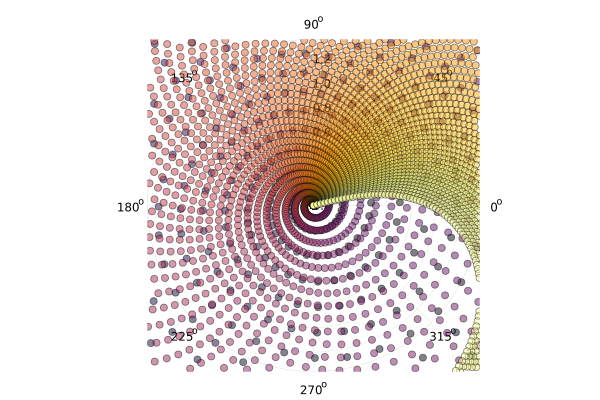

In [48]:
p = scatter(re_ζ, im_ζ, marker_z=re_s, legend=false, alpha=0.5, proj=:polar)
display(p)

In [178]:
function zeta_frame()
    s        = 1
    terms    = 10000000
    ζ        = zeta(s, terms)
    @sprintf("zeta of %.2f using %.0f terms is %.16f to 16 figures", s, terms, ζ)
end

zeta_frame()

"zeta of 1.00 using 10000000 terms is 16.6953113658572718 to 16 figures"